How do the vertical profiles look during spinup?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm, BoundaryNorm, LinearSegmentedColormap
from netCDF4 import Dataset
from pathlib import Path
import xarray as xr

Unable to import google auth packages


In [2]:
### Read in data
## Statistics
sim_dir = Path('/scratch/orybchuk/wakedynamics/amr-wind-tutorial/02_atmosphere/spinup')

fstats = Path(sim_dir, 'post_processing/abl_statistics00000.nc')

# Generic statistics values
ds_stats = xr.open_dataset(fstats,
                          engine='netcdf4')

# Statistics of 1D profiles
ds_pstats = xr.open_dataset(fstats,
                          engine='netcdf4',
                          group='mean_profiles')

In [3]:
### Shared simulation parameters
time = np.round(ds_stats['time'].values,2)  # sec
heights = ds_pstats['h'].values

# Reformat the pstats array to use time
ds_pstats = ds_pstats.rename_dims({'num_time_steps': 'time', 'nlevels':'height'})
ds_pstats['time'] = time
ds_pstats['height'] = heights

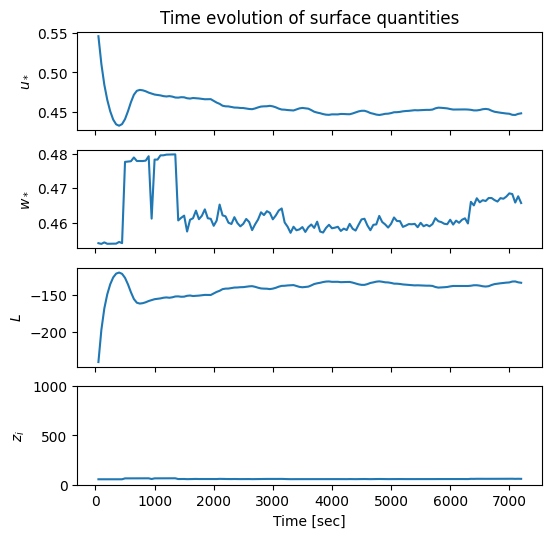

In [4]:
fig, ax = plt.subplots(4, 1, figsize=(6,6), dpi=100, sharex=True)

ax[0].plot(time, ds_stats['ustar'])
ax[1].plot(time, ds_stats['wstar'])
ax[2].plot(time, ds_stats['L'])
ax[3].plot(time, ds_stats['zi'])  # AMR-Winds calculation of buggy in my old version of the code

ax[0].set_title("Time evolution of surface quantities")
ax[0].set_ylabel("$u_*$")
ax[1].set_ylabel("$w_*$")
ax[2].set_ylabel("$L$")
ax[3].set_ylabel("$z_i$")
ax[3].set_xlabel("Time [sec]")

ax[3].set_ylim(0, 1000)

plt.show()

In [5]:
### Calculate TKE and TI profiles
ds_pstats['TKE_r'] = 1/2 * (ds_pstats["u'u'_r"]**2 + ds_pstats["v'v'_r"]**2 + ds_pstats["w'w'_r"]**2)
ds_pstats['TI'] = np.sqrt((ds_pstats["u'u'_r"] + ds_pstats["v'v'_r"] + ds_pstats["w'w'_r"])/3.0) / ds_pstats['hvelmag']
ds_pstats

<xarray.Dataset>
Dimensions:       (height: 64, time: 144)
Coordinates:
  * time          (time) float64 50.0 100.0 150.0 ... 7.1e+03 7.15e+03 7.2e+03
  * height        (height) float64 10.0 30.0 50.0 ... 1.23e+03 1.25e+03 1.27e+03
Data variables: (12/27)
    h             (height) float64 10.0 30.0 50.0 ... 1.23e+03 1.25e+03 1.27e+03
    u             (time, height) float64 ...
    v             (time, height) float64 ...
    w             (time, height) float64 ...
    hvelmag       (time, height) float64 ...
    theta         (time, height) float64 ...
    ...            ...
    w'theta'_sfs  (time, height) float64 ...
    u'v'_sfs      (time, height) float64 ...
    u'w'_sfs      (time, height) float64 ...
    v'w'_sfs      (time, height) float64 ...
    TKE_r         (time, height) float64 0.004026 0.1053 ... 1.774e-05 2.186e-05
    TI            (time, height) float64 0.02363 0.04733 ... 0.004357 0.004494

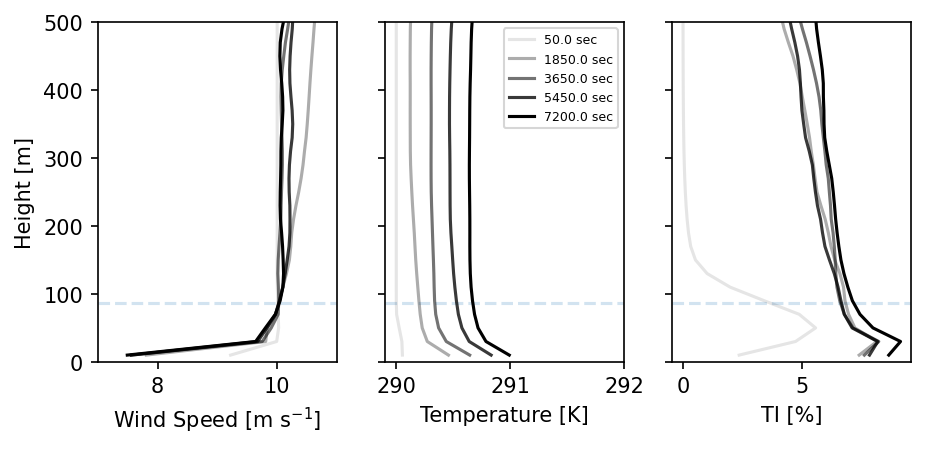

In [6]:
### Look at the spinup wind speed, temperature, and TI
fig, ax = plt.subplots(1, 3, figsize=(7,3), dpi=150, sharey=True)

curr_ens = 0
t_plot = np.arange(time[0], time[-1], 1800)
t_plot = np.append(t_plot, time[-1])   # OPTIONALLY APPEND LAST TIMESTEP
alphas = np.linspace(0.1,1,len(t_plot))

for axs in ax:  # Plot hub-height
    axs.axhline(86.5, color='C0', alpha=0.2, ls='--')
    
for t_curr, alpha in zip(t_plot, alphas):
    ax[0].plot(ds_pstats['hvelmag'].sel(time=t_curr), heights, alpha=alpha, color='k', label=t_curr.astype(str)+' sec')
    ax[1].plot(ds_pstats['theta'].sel(time=t_curr), heights, alpha=alpha, color='k', label=t_curr.astype(str)+' sec')
    ax[2].plot(100*ds_pstats['TI'].sel(time=t_curr), heights, alpha=alpha, color='k', label=t_curr.astype(str)+' sec')
    
ax[0].set_ylabel('Height [m]')
ax[0].set_xlabel('Wind Speed [m s$^{-1}$]')
ax[1].set_xlabel('Temperature [K]')
ax[2].set_xlabel('TI [%]')
    
ax[1].legend(fontsize=6)
ax[1].set_xlim(289.9, 292)

ax[0].set_ylim(0, 500.0)
ax[0].set_xlim(7, 11)
    
plt.show()